# Setting Up Environment/Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
results_base = pd.read_csv('results_tracker/results_tracker_base.csv', index_col = 0)
results_base = results_base[results_base.Won != -1]

# Setting Up Data
results_base['Home_Bucket'] = results_base.Home_Prob.apply(lambda x: '0-10' if x <= 0.1
                                                          else '10-20' if x <= 0.2
                                                          else '20-30' if x <= 0.3
                                                          else '30-40' if x <= 0.4
                                                          else '40-50' if x <= 0.5
                                                          else '50-60' if x <= 0.6
                                                          else '60-70' if x <= 0.7
                                                          else '70-80' if x <= 0.8
                                                          else '80-90' if x <= 0.9
                                                          else '90-100')
results_base['Away_Bucket'] = results_base.Away_Prob.apply(lambda x: '0-10' if x <= 0.1
                                                          else '10-20' if x <= 0.2
                                                          else '20-30' if x <= 0.3
                                                          else '30-40' if x <= 0.4
                                                          else '40-50' if x <= 0.5
                                                          else '50-60' if x <= 0.6
                                                          else '60-70' if x <= 0.7
                                                          else '70-80' if x <= 0.8
                                                          else '80-90' if x <= 0.9
                                                          else '90-100')
results_base['Won_Home'] = results_base.apply(lambda x: 1 if (x.Home_KC > 0) & (x.Won > 0)
                                              else 1 if (x.Away_KC > 0) & (x.Won == 0)
                                             else 0, axis = 1)
results_base['Won_Away'] = results_base.apply(lambda x: 1 if (x.Away_KC > 0) & (x.Won > 0)
                                              else 1 if (x.Home_KC > 0) & (x.Won == 0)
                                             else 0, axis = 1)

# Calculating payoff
def calculate_payoff(row):
    if row.Home_KC>0:
        if row.Home_ML>0:
            payoff = (row.Home_ML/100)*row.Home_Bet
        if row.Home_ML<0:
            payoff = row.Home_Bet/((abs(row.Home_ML)/100))
    elif row.Away_KC>0:
        if row.Away_ML>0:
            payoff = (row.Away_ML/100)*row.Away_Bet
        if row.Away_ML<0:
            payoff = row.Away_Bet/((abs(row.Away_ML)/100))
    return payoff
results_base['Payoff'] = results_base.apply(calculate_payoff, axis = 1)

# Calculating Bet results
def calculate_result(row):
    if row.Won > 0:
        return row.Payoff
    else:
        if row.Home_Bet > 0:
            return -row.Home_Bet
        else:
            return -row.Away_Bet
results_base['Result'] = results_base.apply(calculate_result, axis = 1)

# Testing Calibration

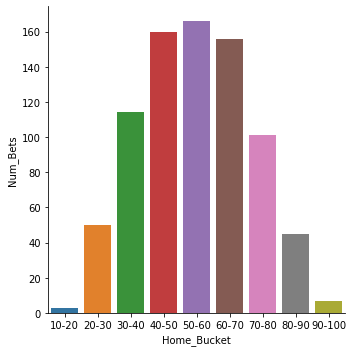

In [71]:
# Home - # of Bets

df = results_base.groupby(['Home_Bucket']).size().reset_index()
df.columns = ['Home_Bucket', 'Num_Bets']

sns.catplot(data = df, kind = 'bar', x = 'Home_Bucket', y = 'Num_Bets')

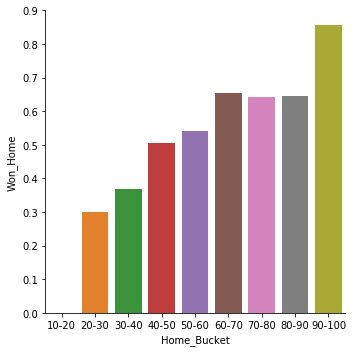

In [27]:
# Home - Team Win %

df = results_base.groupby(['Home_Bucket']).agg({'Won_Home' : 'mean'}).reset_index()

sns.catplot(data = df, kind = 'bar', x = 'Home_Bucket', y = 'Won_Home')

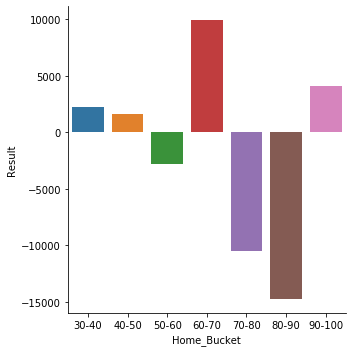

In [42]:
# Home - Bet Payoff

df = results_base[results_base.Home_Bet > 0].groupby(['Home_Bucket']).agg({'Result' : 'sum'}).reset_index()

sns.catplot(data = df, kind = 'bar', x = 'Home_Bucket', y = 'Result')

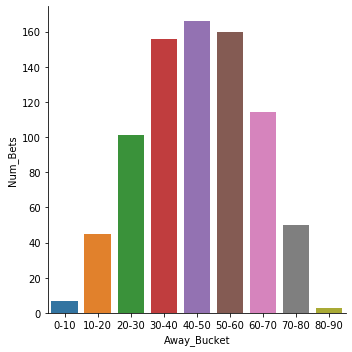

In [73]:
# Away - # of Bets

df = results_base.groupby(['Away_Bucket']).size().reset_index()
df.columns = ['Away_Bucket', 'Num_Bets']

sns.catplot(data = df, kind = 'bar', x = 'Away_Bucket', y = 'Num_Bets')

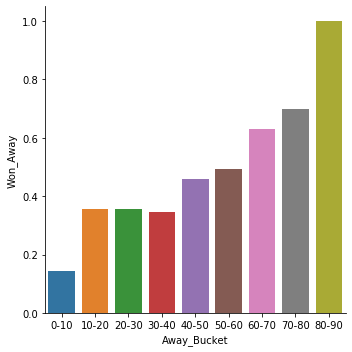

In [30]:
# Away - Team Win %

df = results_base.groupby(['Away_Bucket']).agg({'Won_Away' : 'mean'}).reset_index()

sns.catplot(data = df, kind = 'bar', x = 'Away_Bucket', y = 'Won_Away')

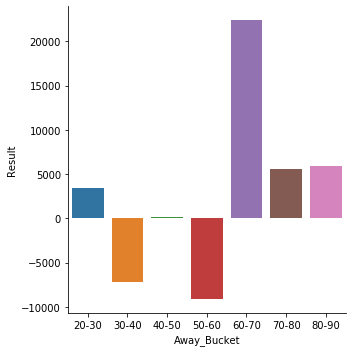

In [43]:
# Away - Bet Win %

df = results_base[results_base.Away_Bet > 0].groupby(['Away_Bucket']).agg({'Result' : 'sum'}).reset_index()

sns.catplot(data = df, kind = 'bar', x = 'Away_Bucket', y = 'Result')

# Performance By Team

In [75]:
# Instantiating items

teams = list(results_base.Home_Team.unique())
team_results_dict = dict()
team_results_dict['Team'] = teams
results = []

for team in teams:
    df_home = results_base[(results_base.Home_Team == team)]
    home_results = df_home[df_home.Home_Bet > 0].Result.sum()

    df_away = results_base[(results_base.Away_Team == team)]
    away_results = df_away[df_away.Away_Bet > 0].Result.sum()
    
    result = home_results + away_results
    
    results.append(result)
    
team_results_dict['Results'] = results
results_df = pd.DataFrame(team_results_dict)

In [74]:
# Checking if bad teams were bad halfway through

bad_teams_df = results_df[results_df.Results <= -5000]
bad_teams = list(bad_teams_df.Team.unique())

# Repeating above exercise for first half of bets
results_base_short = results_base[:400]

teams = list(results_base_short.Home_Team.unique())
team_results_dict = dict()
team_results_dict['Team'] = teams
results = []

for team in teams:
    df_home = results_base_short[(results_base_short.Home_Team == team)]
    home_results = df_home[df_home.Home_Bet > 0].Result.sum()

    df_away = results_base_short[(results_base_short.Away_Team == team)]
    away_results = df_away[df_away.Away_Bet > 0].Result.sum()
    
    result = home_results + away_results
    
    results.append(result)
    
team_results_dict['Results'] = results
results_df_short = pd.DataFrame(team_results_dict)

results_df_short.sort_values(by = 'Results', inplace = True)

merged = results_df_short.merge(results_df, on = 'Team')
merged.columns = ['Team', 'Results_Half', 'Results_Whole']
merged.sort_values(by = 'Results_Half', inplace = True)

# RL Work

### Code Examples

### Environment

In [16]:
import gym
import json
import datetime as dt
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
from stable_baselines3 import TD3
from stable_baselines3.common.vec_env import DummyVecEnv

data = results_base.reset_index(drop = True)

In [4]:
# Environment

class BettingEnv(gym.Env):
    
    def __init__(self, df, initial_funds):
        self.df = df
        self.current_step = 0
        self.initial_funds = initial_funds
        self.current_funds = initial_funds
        # Actions of the format Team 1 x%, Team 2 x%, No bet, etc.
        self.action_space = gym.spaces.Box(
          low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(6,), dtype=np.float32)
    
    def step(self, action):
        self.current_step += 1
        action_type = action[0]
        action_amount = (action[1] * self.current_funds) / 100.0
        
        if self.current_step >= len(self.df):
            done = True
            reward = 0
            obs = self.df.loc[len(self.df) - 1, ['Home_Prob', 'Away_Prob', 'Home_Diff', 
                                                 'Away_Diff', 'Home_KC', 'Away_KC']].values
            
        else:
            done = False
            row = self.df.loc[self.current_step, :]
            obs = row[['Home_Prob', 'Away_Prob', 'Home_Diff', 'Away_Diff', 'Home_KC', 'Away_KC']].values
            
            if action_type < 1:
                # Determining payoff (home team)
                if row[['Home_ML']].values[0] > 0:
                    payoff = (row[['Home_ML']].values[0]/100)*action_amount
                else:
                    payoff = action_amount/((abs(row[['Home_ML']].values[0])/100))
                # Determining reward based on result
                if row[['Won_Home']].values[0] == 1:
                    reward = payoff
                else:
                    reward = -(action_amount)
                
            elif action_type < 2:
                # Determining payoff (away team)
                if row[['Away_ML']].values[0] > 0:
                    payoff = (row[['Away_ML']].values[0]/100)*action_amount
                else:
                    payoff = action_amount/((abs(row[['Away_ML']].values[0])/100))
                # Determining reward based on result
                if row[['Won_Away']].values[0] == 1:
                    reward = payoff
                else:
                    reward = -(action_amount)
                
            else:
                # No bet
                reward = 0

        self.current_funds += reward
        return obs, reward, done, {}
    
    def reset(self):
        self.current_step = 0
        self.current_funds = self.initial_funds
        return self.df.loc[self.current_step, ['Home_Prob', 'Away_Prob', 'Home_Diff', 'Away_Diff', 'Home_KC', 'Away_KC']]
    
    def render(self, mode='human'):
        # Render the environment
        print(f"Current funds: {self.current_funds}")

### Trying different models

In [11]:
def train_and_test_rl(model):
    env = DummyVecEnv([lambda: BettingEnv(data, 100000)])
    model.learn(total_timesteps=1000)

    for j in range(10):
        obs = env.reset()
        for i in range(len(data)):
            action, _states = model.predict(obs)
            obs, rewards, dones, info = env.step(action)
            if i == len(data) - 2:
                env.render()
    return

In [12]:
# PPO

train_and_test_rl(model = PPO('MlpPolicy', env, verbose=1))

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 439  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
Current funds: 77116.93436046505
Current funds: 113911.00994711848
Current funds: 88310.24683525618
Current funds: 89278.33400123728
Current funds: 106979.17043523796
Current funds: 106048.26940948721
Current funds: 102239.51552517166
Current funds: 107087.09625491092
Current funds: 92754.58236674654
Current funds: 96864.6268418039


In [13]:
# SAC

train_and_test_rl(model = SAC('MlpPolicy', env, verbose=1))

Using cpu device
Current funds: 99984.509296923
Current funds: 99978.52269573303
Current funds: 99994.7693671454
Current funds: 100005.28510257005
Current funds: 100041.18094561035
Current funds: 100005.03900929028
Current funds: 100003.90096403942
Current funds: 99997.72452890166
Current funds: 99949.49480551376
Current funds: 100009.62407004058


In [14]:
# DDPG

train_and_test_rl(model = DDPG('MlpPolicy', env, verbose=1))

Using cpu device
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000


In [17]:
# TD3

train_and_test_rl(model = TD3('MlpPolicy', env, verbose=1))

Using cpu device
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
Current funds: 100000
